# Assignment 2 - Continuous Visualization

Imagine you're a data scientist working for the University of Michigan teaching and learning team, and one of your job responsibilities is to offer instructional advice based on course performance metrics. As part of this activity you might be asked to analyze student's grade distribution in a range of undergraduate and graduate level courses to draw comparisons between courses and come up with insights regarding how to enhance residential education across different subjects.

## Question 1: Grade Distribution Comparison (60%)

You have been given a sample data file `assets/class_grades.csv` for a number of courses, and you have been asked to consider the letter grades for STATS 250, DATASCI 306, MATH 217, ENGLISH 125, ECON 101, EECS 545 for the past records since 2015. The student grades are stored in 6 columns: 
* `STATS250_grade` stores the letter grades for those who took the STATS 250 course
* `DATASCI306_grade` stores the letter grades for those who took the DATASCI 306 course
* `MATH217_grade` stores the letter grades for those who took the MATH 217 course
* `ENGLISH125_grade` stores the letter grades for those who took the ENGLISH 125 course
* `ECON101_grade` stores the letter grades for those who took the ECON 101 course
* `EECS545_grade` stores the letter grades for those who took the EECS 545 course

Prior to drawing plots for student grade distribution, it's useful to compute the total student enrollments for each course (of course, you need to ignore NAN values) and convert student's letter grades into standard grade points. Here's a nice table on the grade point systems available at the umich website:

| Letter Grade | Grade Point |
|:---: |:----:|
| A+ | 4.3 |
| A | 4.0 |
| A- | 3.7 |
| B+ | 3.3 |
| B | 3 |
| B- | 2.7 |
| C+ | 2.3 |
| C | 2 |
| C- | 1.7 |
| D+ | 1.3 |
| D | 1 |
| D- | 0.7 |
| E | 0 |

You are asked to:
* Make a **3 * 2** figure (so 6 subplots) such that for each course you have a **histogram** using the student grade samples respectively
* Remove the gaps between the bars in the histograms if any
* For each probability plot, you should overlay a normal distribution with the same mean and standard deviation parameters as you see in the samples (you can calculate this!)
* You should of course use a legend on each plot to specify the corresponding course name and number of students involved. For example, you can draw a legend and specify "STATS 250, n=5000" to indicate that you are analyzing STATS 250 course with 5000 enrolled students records being used for analysis
* We want to demonstrate to the team why sample size is an important factor if you want to articulate performance issues. For the STATS 250 subpolot **only**, take a random sample of 100 student grades and overlay its corresponding t-distribution (with the same mean and standard deviation parameters as the normal distribution).

Hints:
* To make subplots, one good way to start with is to use `fig, ax = plt.subplot()`
* To remove the gaps that might show up in histograms, you can customize the `bins` parameter
* If you want to make histograms using the distplot function in seaborn package, you need to specify the parameters `kde = False` and `norm_hist = True`

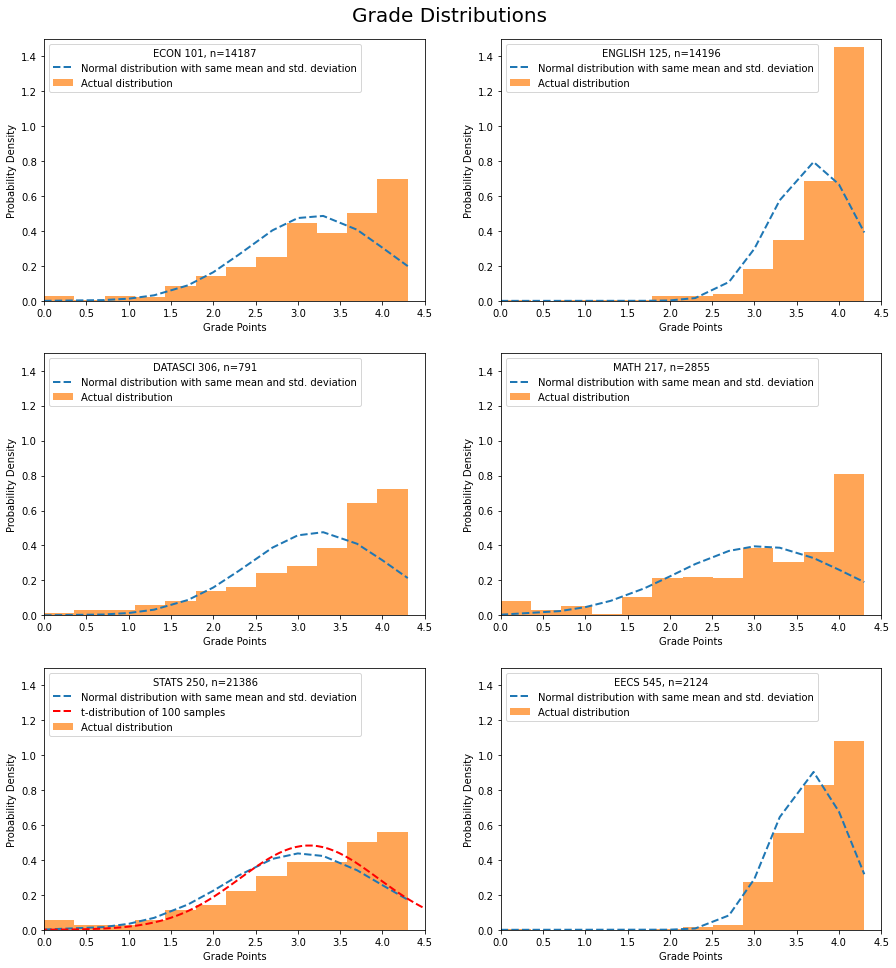

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import random
from scipy.stats import norm
from scipy.stats import t
import scipy.stats as stats

def grade_distribution():
    
    # import dataframe
    df=pd.read_csv("/home/jovyan/work/resources/course_assignments/assets/assets/class_grades.csv", index_col=0)
    
    # create a dataframe mapping letter grades to grade points
    df_conv=pd.DataFrame({"letter":["A+","A","A-","B+","B","B-","C+","C","C-","D+","D","D-","E"], 
                          "point":[4.3,4.0,3.7,3.3,3,2.7,2.3,2,1.7,1.3,1,0.7,0]})
    
    # replace letter grades with grade points
    df=df.replace(df_conv.set_index('letter')['point'])
    
    # drop NaN, convert pandas DataFrame object to numpy array and sort
    eco = np.asarray(df["ECON101_grade"].dropna())
    eco = sorted(eco)
    eng = np.asarray(df["ENGLISH125_grade"].dropna())
    eng = sorted(eng)
    dat = np.asarray(df["DATASCI306_grade"].dropna())
    dat = sorted(dat)
    mat = np.asarray(df["MATH217_grade"].dropna())
    mat = sorted(mat)
    sta = np.asarray(df["STATS250_grade"].dropna())
    sta = sorted(sta)
    eec = np.asarray(df["EECS545_grade"].dropna())
    eec = sorted(eec)

    # for STATS 250, select 100 random grades
    sta_100=random.choices(sta, k=100)
    
    # fit normal distribution using pdf, same mean and standard deviation
    fit_eco = norm.pdf(eco, np.mean(eco), np.std(eco))
    fit_eng = norm.pdf(eng, np.mean(eng), np.std(eng))
    fit_dat = norm.pdf(dat, np.mean(dat), np.std(dat))
    fit_mat = norm.pdf(mat, np.mean(mat), np.std(mat))
    fit_sta = norm.pdf(sta, np.mean(sta), np.std(sta))
    fit_eec = norm.pdf(eec, np.mean(eec), np.std(eec))

    # fit t-distribution using pdf using mean and standard deviation of 100 samples
    sta_t = t(df=99, loc=np.mean(sta_100), scale=np.std(sta_100))
    x = np.linspace(sta_t.ppf(0.0001), sta_t.ppf(0.9999), 100)
    y = sta_t.pdf(x)

    # create 3x2 subplot
    fig, axs = plt.subplots(3, 2, figsize=(15,15))

    # title for main plot
    fig.suptitle("Grade Distributions", fontsize=20)

    # reduce space between title and subplot
    fig.subplots_adjust(top=0.95)

    # plot normal distribution and histogram for each of the subjects
    axs[0, 0].plot(eco, fit_eco, "--", linewidth=2, label="Normal distribution with same mean and std. deviation")
    axs[0, 0].hist(eco, density=True, bins=12, label="Actual distribution", alpha=0.7)
    axs[0, 0].legend(loc="upper left", title="ECON 101, n={}".format(len(eco)))

    axs[0, 1].plot(eng, fit_eng, "--", linewidth=2, label="Normal distribution with same mean and std. deviation")
    axs[0, 1].hist(eng, density=True, bins=12, label="Actual distribution", alpha=0.7)
    axs[0, 1].legend(loc="upper left", title="ENGLISH 125, n={}".format(len(eng)))

    axs[1, 0].plot(dat, fit_dat, "--", linewidth=2, label="Normal distribution with same mean and std. deviation")
    axs[1, 0].hist(dat, density=True, bins=12, label="Actual distribution", alpha=0.7)
    axs[1, 0].legend(loc="upper left", title="DATASCI 306, n={}".format(len(dat)))

    axs[1, 1].plot(mat, fit_mat, "--", linewidth=2, label="Normal distribution with same mean and std. deviation")
    axs[1, 1].hist(mat, density=True, bins=12, label="Actual distribution", alpha=0.7)
    axs[1, 1].legend(loc="upper left", title="MATH 217, n={}".format(len(mat)))

    axs[2, 0].plot(sta, fit_sta, "--", linewidth=2, label="Normal distribution with same mean and std. deviation")
    axs[2, 0].plot(x, y, "--", linewidth=2, label="t-distribution of 100 samples", color="red")
    axs[2, 0].hist(sta, density=True, bins=12, label="Actual distribution", alpha=0.7)
    axs[2, 0].legend(loc="upper left", title="STATS 250, n={}".format(len(sta)))

    axs[2, 1].plot(eec, fit_eec, "--", linewidth=2, label="Normal distribution with same mean and std. deviation")
    axs[2, 1].hist(eec, density=True, bins=12, label="Actual distribution", alpha=0.7)
    axs[2, 1].legend(loc="upper left", title="EECS 545, n={}".format(len(eec)))

    # define custom x- and y-axis limits
    custom_xlim = (0.0, 4.5)
    custom_ylim = (0.0, 1.5)

    # set the custom limits for all axes
    plt.setp(axs, xlim=custom_xlim, ylim=custom_ylim)
    
    # set labels for axes
    for ax in axs.flat:
        ax.set(xlabel="Grade Points", ylabel="Probability Density")

    plt.show()

grade_distribution()

## Question 2: Grade Distribution Normality Check (40%)

Seeing the student grade distributions of the 6 large residential courses, the team is tempted to draft recommendations for instructors and report to them what particular aspects could be addressed to improve students' academic learning outcome. However, before they launch statistical tests, they need to verify if the student grades data approximately follows normal distribution, a sufficient condition rendering the design of statistical models valid for those courses. You suggest that a QQ-plot is a great method to determine how similar a distribution is to another. Great idea!
* Make a 3 * 2 figure (again, 6 subplots) so that for each course you have a QQ plot using the student grade samples versus the normal distribution with the same mean and standard deviation
* You need to use a legend on each plot to specify the corresponding course name and number of students involved. For example, you can draw a legend and specify "STATS 250, n=5000" to indicate that you are analyzing STATS 250 course with 5000 enrolled students records being used for analysis
* For each QQ-plot, mark observations which are 2 standard deviations outside from the QQ-line (a straight line showing the theoretical values for different quantiles under normal distribution).  You may use the annotate tool inside the graph to circle each such instance or design some other manner to call out these points.
* Write a couple of sentence about the figure discussing the courses and whether they seem to be normally distributed.

Hint: You may find using `fig = plt.figure()` and `fig.add_subplot()` functions helpful to create subplots. You don't have to use these functions though.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


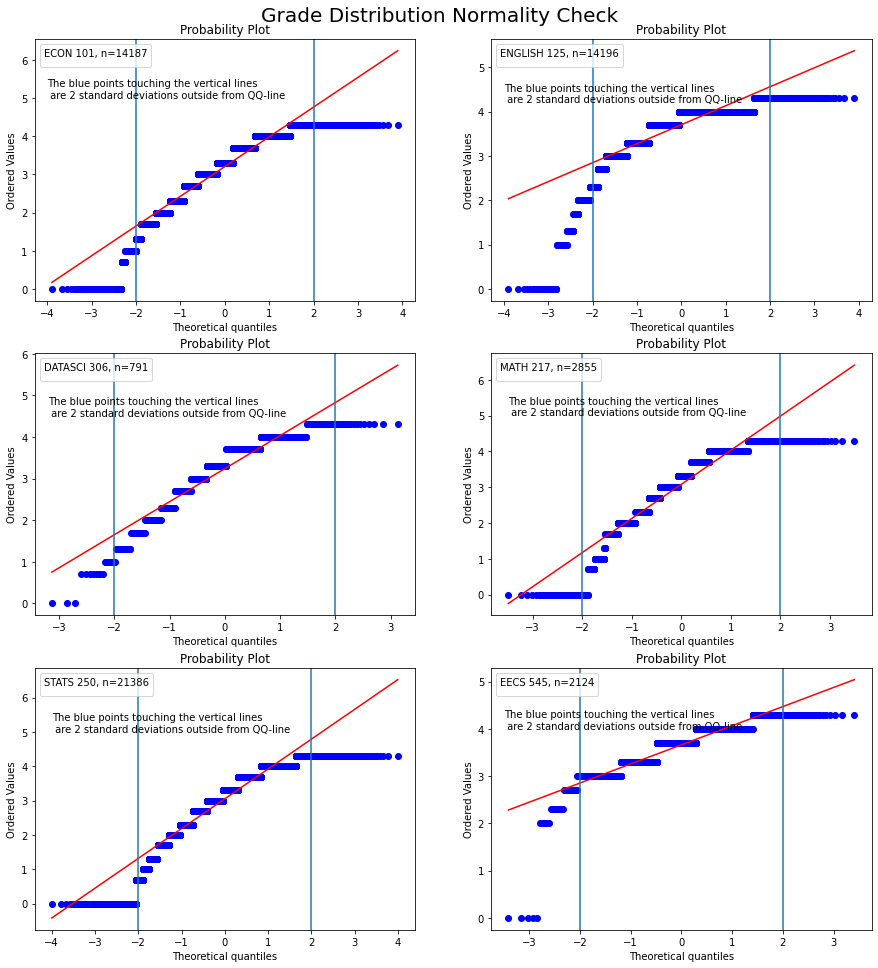

In [2]:
def grade_normality():
    
    # import dataframe
    df=pd.read_csv("/home/jovyan/work/resources/course_assignments/assets/assets/class_grades.csv", index_col=0)
    
    # create a dataframe mapping letter grades to grade points
    df_conv=pd.DataFrame({"letter":["A+","A","A-","B+","B","B-","C+","C","C-","D+","D","D-","E"], 
                          "point":[4.3,4.0,3.7,3.3,3,2.7,2.3,2,1.7,1.3,1,0.7,0]})
    
    # replace letter grades with grade points
    df=df.replace(df_conv.set_index('letter')['point'])
    
    # create 3x2 subplot
    fig, axs = plt.subplots(3, 2, figsize=(15,15))

    # title for main subplot
    fig.suptitle("Grade Distribution Normality Check", fontsize=20)

    # reduce space between title and subplot
    fig.subplots_adjust(top=0.95)

    # plot QQ-plot for each of the subjects comparing against normal distribution, plot vertical lines for points 2 STD away
    stats.probplot(df["ECON101_grade"].dropna(), dist=stats.norm, plot=axs[0, 0])
    axs[0, 0].legend(loc="upper left", title="ECON 101, n={}".format(len(df["ECON101_grade"].dropna())))
    axs[0, 0].axvline(x=-2)
    axs[0, 0].axvline(x=2)
    axs[0, 0].annotate("The blue points touching the vertical lines\n are 2 standard deviations outside from QQ-line",  xy=(-4, 5))

    stats.probplot(df["ENGLISH125_grade"].dropna(), dist=stats.norm, plot=axs[0, 1])
    axs[0, 1].legend(loc="upper left", title="ENGLISH 125, n={}".format(len(df["ENGLISH125_grade"].dropna())))
    axs[0, 1].axvline(x=-2)
    axs[0, 1].axvline(x=2)
    axs[0, 1].annotate("The blue points touching the vertical lines\n are 2 standard deviations outside from QQ-line",  xy=(-4, 4.2))

    stats.probplot(df["DATASCI306_grade"].dropna(), dist=stats.norm, plot=axs[1, 0])
    axs[1, 0].legend(loc="upper left", title="DATASCI 306, n={}".format(len(df["DATASCI306_grade"].dropna())))
    axs[1, 0].axvline(x=-2)
    axs[1, 0].axvline(x=2)
    axs[1, 0].annotate("The blue points touching the vertical lines\n are 2 standard deviations outside from QQ-line",  xy=(-3.2, 4.5))

    stats.probplot(df["MATH217_grade"].dropna(), dist=stats.norm, plot=axs[1, 1])
    axs[1, 1].legend(loc="upper left", title="MATH 217, n={}".format(len(df["MATH217_grade"].dropna())))
    axs[1, 1].axvline(x=-2)
    axs[1, 1].axvline(x=2)
    axs[1, 1].annotate("The blue points touching the vertical lines\n are 2 standard deviations outside from QQ-line",  xy=(-3.5, 5))

    stats.probplot(df["STATS250_grade"].dropna(), dist=stats.norm, plot=axs[2, 0])
    axs[2, 0].legend(loc="upper left", title="STATS 250, n={}".format(len(df["STATS250_grade"].dropna())))
    axs[2, 0].axvline(x=-2)
    axs[2, 0].axvline(x=2)
    axs[2, 0].annotate("The blue points touching the vertical lines\n are 2 standard deviations outside from QQ-line",  xy=(-4, 5))

    stats.probplot(df["EECS545_grade"].dropna(), dist=stats.norm, plot=axs[2, 1])
    axs[2, 1].legend(loc="upper left", title="EECS 545, n={}".format(len(df["EECS545_grade"].dropna())))
    axs[2, 1].axvline(x=-2)
    axs[2, 1].axvline(x=2)
    axs[2, 1].annotate("The blue points touching the vertical lines\n are 2 standard deviations outside from QQ-line",  xy=(-3.5, 4))

    plt.show()

grade_normality()

The red lines in the QQ-plots indicate the theoretical quantiles, while the blue points are the actual grade points.

While some of the points in each figure seem to fall along the red line, most of them do not, indicating that they do not follow a normal distribution. This is further strengthened by an examination of the histograms in the previous question, which show that the data for all of the courses skew heavily to the right.